# Initial Model Creation

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [2]:
smile_df = pd.read_csv('csvs/smiles.csv')

In [3]:
smile_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.591483,0.478931,-0.022315,0.589558,0.434745,-0.056303,0.590747,0.448578,-0.028139,0.582048,...,-0.009445,0.609812,0.320910,-0.016107,0.670336,0.294218,-0.000382,0.675857,0.287938,-0.000577
1,0.550291,0.458364,-0.021697,0.540483,0.408831,-0.053627,0.548121,0.423820,-0.026857,0.538181,...,-0.013862,0.573479,0.297845,-0.019402,0.638548,0.275266,-0.015223,0.645099,0.265842,-0.016157
2,0.676942,0.448803,-0.022007,0.688413,0.398004,-0.055319,0.680457,0.414213,-0.027886,0.674139,...,-0.003926,0.686901,0.286538,-0.011182,0.733206,0.258659,0.020742,0.737817,0.249977,0.022153
3,0.598266,0.443569,-0.025681,0.606105,0.392349,-0.058284,0.603822,0.408346,-0.030016,0.608736,...,-0.006092,0.641476,0.296628,-0.013123,0.702481,0.305078,0.005533,0.709057,0.301164,0.005836
4,0.589426,0.439690,-0.027079,0.581730,0.389268,-0.056749,0.585271,0.405555,-0.029748,0.568221,...,-0.005554,0.592205,0.279692,-0.012233,0.649463,0.236065,0.002746,0.654414,0.226527,0.002685


In [4]:
smile_df['isSmile'] = 1

In [5]:
smile_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x465,y465,z465,x466,y466,z466,x467,y467,z467,isSmile
0,0.591483,0.478931,-0.022315,0.589558,0.434745,-0.056303,0.590747,0.448578,-0.028139,0.582048,...,0.609812,0.320910,-0.016107,0.670336,0.294218,-0.000382,0.675857,0.287938,-0.000577,1
1,0.550291,0.458364,-0.021697,0.540483,0.408831,-0.053627,0.548121,0.423820,-0.026857,0.538181,...,0.573479,0.297845,-0.019402,0.638548,0.275266,-0.015223,0.645099,0.265842,-0.016157,1
2,0.676942,0.448803,-0.022007,0.688413,0.398004,-0.055319,0.680457,0.414213,-0.027886,0.674139,...,0.686901,0.286538,-0.011182,0.733206,0.258659,0.020742,0.737817,0.249977,0.022153,1
3,0.598266,0.443569,-0.025681,0.606105,0.392349,-0.058284,0.603822,0.408346,-0.030016,0.608736,...,0.641476,0.296628,-0.013123,0.702481,0.305078,0.005533,0.709057,0.301164,0.005836,1
4,0.589426,0.439690,-0.027079,0.581730,0.389268,-0.056749,0.585271,0.405555,-0.029748,0.568221,...,0.592205,0.279692,-0.012233,0.649463,0.236065,0.002746,0.654414,0.226527,0.002685,1


In [6]:
neutral_df = pd.read_csv('csvs/neutral.csv')

In [7]:
neutral_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.544717,0.626878,-0.013814,0.544914,0.590297,-0.031700,0.545020,0.600046,-0.015182,0.540067,...,-0.003371,0.555693,0.523951,-0.007379,0.589243,0.512065,0.002810,0.591868,0.509386,0.002814
1,0.629722,0.585329,-0.018472,0.637728,0.549768,-0.026454,0.627916,0.562754,-0.015771,0.625841,...,0.013552,0.624588,0.500502,0.008449,0.640559,0.500505,0.041241,0.641860,0.496189,0.043607
2,0.503159,0.582817,-0.018752,0.497537,0.542479,-0.029629,0.503434,0.556163,-0.016628,0.498350,...,-0.001564,0.521118,0.485599,-0.004796,0.559348,0.478320,-0.007438,0.563150,0.474536,-0.008492
3,0.631418,0.569483,-0.022988,0.643727,0.539669,-0.029140,0.638171,0.552527,-0.018588,0.647851,...,0.010025,0.663465,0.516452,0.005822,0.689943,0.544659,0.018461,0.694182,0.543863,0.019230
4,0.490831,0.586877,-0.020458,0.477378,0.557644,-0.025802,0.484946,0.568970,-0.016597,0.468371,...,0.005457,0.480056,0.513426,0.002230,0.506105,0.484763,0.003781,0.507847,0.477179,0.003617


In [8]:
neutral_df['isSmile'] = 0

In [9]:
neutral_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x465,y465,z465,x466,y466,z466,x467,y467,z467,isSmile
0,0.544717,0.626878,-0.013814,0.544914,0.590297,-0.031700,0.545020,0.600046,-0.015182,0.540067,...,0.555693,0.523951,-0.007379,0.589243,0.512065,0.002810,0.591868,0.509386,0.002814,0
1,0.629722,0.585329,-0.018472,0.637728,0.549768,-0.026454,0.627916,0.562754,-0.015771,0.625841,...,0.624588,0.500502,0.008449,0.640559,0.500505,0.041241,0.641860,0.496189,0.043607,0
2,0.503159,0.582817,-0.018752,0.497537,0.542479,-0.029629,0.503434,0.556163,-0.016628,0.498350,...,0.521118,0.485599,-0.004796,0.559348,0.478320,-0.007438,0.563150,0.474536,-0.008492,0
3,0.631418,0.569483,-0.022988,0.643727,0.539669,-0.029140,0.638171,0.552527,-0.018588,0.647851,...,0.663465,0.516452,0.005822,0.689943,0.544659,0.018461,0.694182,0.543863,0.019230,0
4,0.490831,0.586877,-0.020458,0.477378,0.557644,-0.025802,0.484946,0.568970,-0.016597,0.468371,...,0.480056,0.513426,0.002230,0.506105,0.484763,0.003781,0.507847,0.477179,0.003617,0


## Put it all together

In [11]:
all_df = pd.concat([smile_df,neutral_df])

In [13]:
all_df['isSmile'] = all_df['isSmile'].astype('int')
y = np.asarray(all_df['isSmile'])
y [0:5]

array([1, 1, 1, 1, 1])

In [14]:
just_x_df = all_df.drop('isSmile', axis = 1)

In [15]:
just_x_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.591483,0.478931,-0.022315,0.589558,0.434745,-0.056303,0.590747,0.448578,-0.028139,0.582048,...,-0.009445,0.609812,0.320910,-0.016107,0.670336,0.294218,-0.000382,0.675857,0.287938,-0.000577
1,0.550291,0.458364,-0.021697,0.540483,0.408831,-0.053627,0.548121,0.423820,-0.026857,0.538181,...,-0.013862,0.573479,0.297845,-0.019402,0.638548,0.275266,-0.015223,0.645099,0.265842,-0.016157
2,0.676942,0.448803,-0.022007,0.688413,0.398004,-0.055319,0.680457,0.414213,-0.027886,0.674139,...,-0.003926,0.686901,0.286538,-0.011182,0.733206,0.258659,0.020742,0.737817,0.249977,0.022153
3,0.598266,0.443569,-0.025681,0.606105,0.392349,-0.058284,0.603822,0.408346,-0.030016,0.608736,...,-0.006092,0.641476,0.296628,-0.013123,0.702481,0.305078,0.005533,0.709057,0.301164,0.005836
4,0.589426,0.439690,-0.027079,0.581730,0.389268,-0.056749,0.585271,0.405555,-0.029748,0.568221,...,-0.005554,0.592205,0.279692,-0.012233,0.649463,0.236065,0.002746,0.654414,0.226527,0.002685


In [16]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 5.91483057e-01,  4.78930503e-01, -2.23145094e-02, ...,
         6.75857008e-01,  2.87937611e-01, -5.77243802e-04],
       [ 5.50291181e-01,  4.58363563e-01, -2.16968395e-02, ...,
         6.45098925e-01,  2.65841842e-01, -1.61574204e-02],
       [ 6.76941812e-01,  4.48803127e-01, -2.20069941e-02, ...,
         7.37817168e-01,  2.49977216e-01,  2.21532099e-02],
       [ 5.98266363e-01,  4.43568885e-01, -2.56810039e-02, ...,
         7.09057212e-01,  3.01163971e-01,  5.83581626e-03],
       [ 5.89425623e-01,  4.39689875e-01, -2.70790458e-02, ...,
         6.54413819e-01,  2.26526722e-01,  2.68523535e-03]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (26, 1404) (26,)
Test set: (7, 1404) (7,)


In [18]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprec

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      1.00      0.83         5

   micro avg       0.71      0.71      0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

Confusion matrix, without normalization
[[5 0]
 [2 0]]


c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


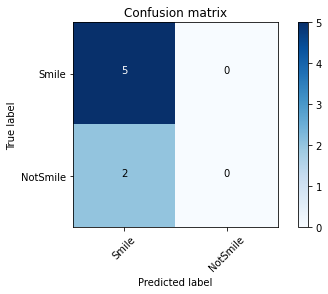

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Smile','NotSmile'],normalize= False,  title='Confusion matrix')

In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5952380952380951

In [26]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7142857142857143

In [30]:
import pickle
with open('smile_neutral_svm_rbf.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [45]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [50]:
import cv2
import mediapipe
import numpy as np
import csv
cap = cv2.VideoCapture(0)

# facemesh

faceModule = mediapipe.solutions.face_mesh
mp_drawing = mediapipe.solutions.drawing_utils # Drawing helpers

circleDrawingSpec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mp_drawing.DrawingSpec(thickness=1, color=(0,255,0))
 
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = face.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                point_values = []

                for i in range(0, 468):
                    pt1 = faceLandmarks.landmark[i]

                    point_values.append(pt1.x)
                    point_values.append(pt1.y)
                    point_values.append(pt1.z)
                
                
                 # Make Detections
                X = pd.DataFrame([point_values])
                body_language_class = model.predict(X)[0]
                print(body_language_class)
                
                mp_drawing.draw_landmarks(image, faceLandmarks, faceModule.FACEMESH_CONTOURS, circleDrawingSpec, lineDrawingSpec)
 

                # Display Class
                cv2.putText(image, 'CLASS'
                            , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(body_language_class)
                            , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


KeyboardInterrupt: 